In [1]:
# Packages
import sys; sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from src.collocation import collocation1d
from src.plot import plot_collocation1d, plot_simulation1d
from src.generator import generator1d
from src.polynomial import polynomial1d

# Case 1

- One variable
- Zero boundary condition
- Linear equation
- Polynomial solution

Equation: 

$$
\begin{align}
\begin{cases}
&u''+u'+u = 10x^3+14x^2-34x-26 \\
&u(0) = 0\\
&u(1) = 0
\end{cases}
\end{align}
$$

Analytical solution: 

$$u = 10x^3 - 16x^2 + 6x$$

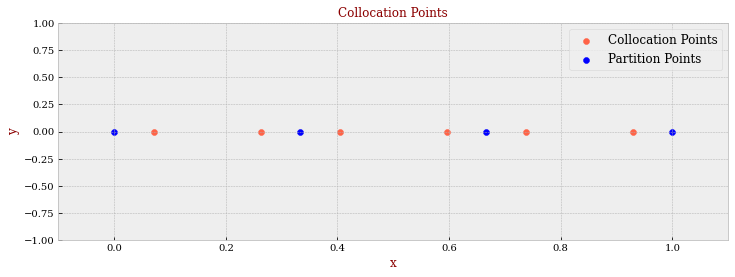

In [2]:
# Parameter
n = 3
r = 3
f = lambda x: 10 * x ** 3 + 14 * x ** 2 + 34 * x - 26
u = lambda x: 10 * x ** 3 - 16 * x ** 2 + 6 * x
b1 = 0
b2 = 0
# Partition and Collocation
partition, collocation = collocation1d(n, r)
# Show Partition and Collocation Points
plot_collocation1d(partition, collocation, n, r)
plt.savefig('../fig/case1-collocation-points.jpg')

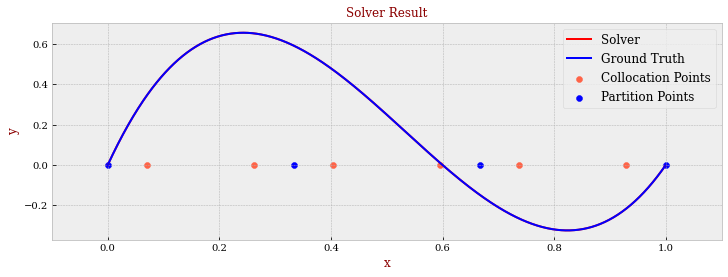

In [3]:
# Generate Algebra Equation
weight, value = generator1d(partition, collocation, n, r, f, b1, b2)
# Solve the Algebra Euqation
solution = np.linalg.solve(weight, value)
# Get Simulation Value in [0, 1]
position, simulation = polynomial1d(partition, solution, n, r, num=256)
# Get Ground Truth Value in [0, 1]
ground_truth = u(position)
# Plot Result
plot_simulation1d(position, simulation, ground_truth, partition, collocation, n, r)
plt.savefig('../fig/case1-result.jpg')

In [4]:
# Calculate Loss
loss = np.sum((ground_truth - simulation) ** 2)
print(f'Loss\t{loss:.4f}')

Loss	0.0000


# Case 2

- One variable
- Fixed boundary condition
- Linear equation
- Polynomial solution
- Higher dimension

Equation:


$$
\begin{align}
\begin{cases}
&u''+u'+u = 10x^4 + 26x^3+83.6x^2-73x+10 \\
&u(0) = 0\\
&u(1) = 1
\end{cases}
\end{align}
$$

Analytical solution: 

$$u = 10x^4 - 14x^3 + 5.6x^2 - 0.64x$$

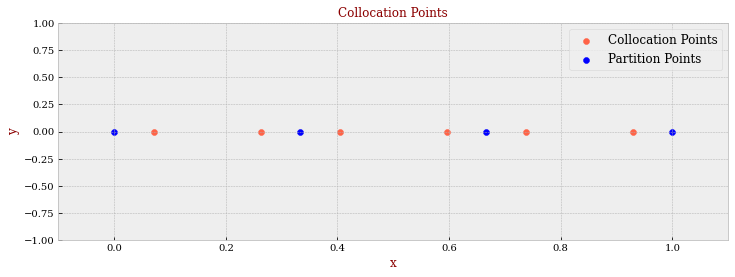

In [5]:
# Parameter
n = 3
r = 3
f = lambda x: 10 * x ** 4 + 26 * x ** 3 + 83.6 * x ** 2 - 73 * x + 10
u = lambda x: 10 * x ** 4 - 14 * x ** 3 + 5.6 * x ** 2 - 0.64 * x
b1 = 0
b2 = 1
# Partition and Collocation
partition, collocation = collocation1d(n, r)
# Show Partition and Collocation Points
plot_collocation1d(partition, collocation, n, r)

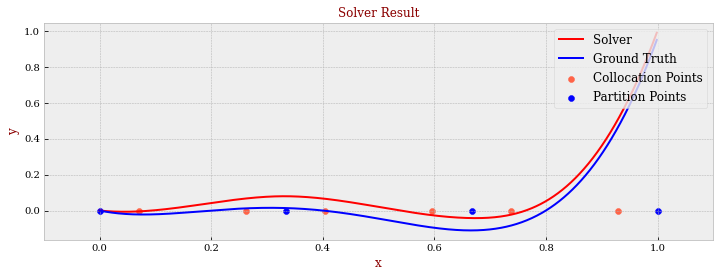

In [6]:
# Generate Algebra Equation
weight, value = generator1d(partition, collocation, n, r, f, b1, b2)
# Solve the Algebra Euqation
solution = np.linalg.solve(weight, value)
# Get Simulation Value in [0, 1]
position, simulation = polynomial1d(partition, solution, n, r, num=256)
# Get Ground Truth Value in [0, 1]
ground_truth = u(position)
# Plot Result
plot_simulation1d(position, simulation, ground_truth, partition, collocation, n, r)
plt.savefig('../fig/case2-result.jpg')

In [7]:
# Calculate Loss
loss = np.sum((ground_truth - simulation) ** 2)
print(f'Loss\t{loss:.4f}')

Loss	2.2586


# Case 3

- One variable
- Zero boundary condition
- Nonlinear equation
- Nonlinear solution

Equation:


$$
\begin{align}
\begin{cases}
&u''+u'+u = (1-9\pi^2)\mathrm{sin}(3\pi x) + 3\pi \mathrm{cos}(3\pi x)\\
&u(0) = 0\\
&u(1) = 0
\end{cases}
\end{align}
$$

Analytical solution: 

$$u = \mathrm{sin}(3\pi x)$$

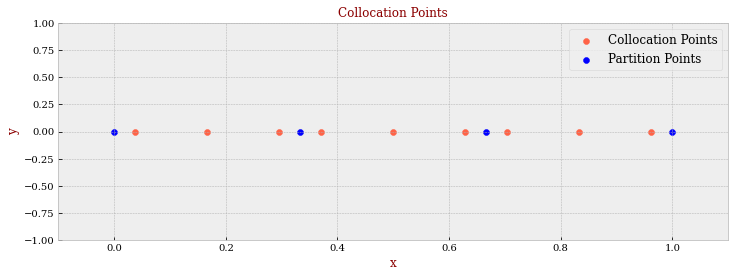

In [8]:
# Parameter
n = 3
r = 4
f = lambda x: (1 - 9 * np.pi ** 2) * np.sin(3 * np.pi * x) + 3 * np.pi * np.cos(3 * np.pi * x)
u = lambda x: np.sin(3 * np.pi * x)
b1 = 0
b2 = 0
# Partition and Collocation
partition, collocation = collocation1d(n, r)
# Show Partition and Collocation Points
plot_collocation1d(partition, collocation, n, r)

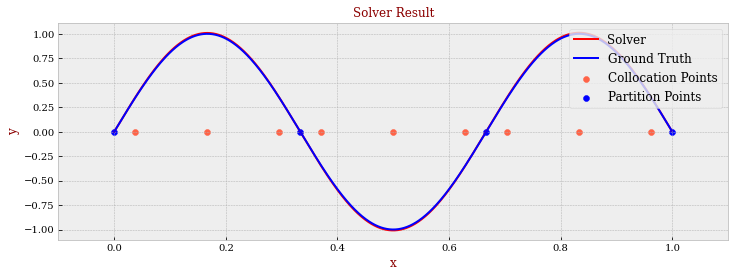

In [9]:
# Generate Algebra Equation
weight, value = generator1d(partition, collocation, n, r, f, b1, b2)
# Solve the Algebra Euqation
solution = np.linalg.solve(weight, value)
# Get Simulation Value in [0, 1]
position, simulation = polynomial1d(partition, solution, n, r, num=256)
# Get Ground Truth Value in [0, 1]
ground_truth = u(position)
# Plot Result
plot_simulation1d(position, simulation, ground_truth, partition, collocation, n, r)
plt.savefig('../fig/case3-result.jpg')

In [10]:
# Calculate Loss
loss = np.sum((ground_truth - simulation) ** 2)
print(f'Loss\t{loss:.4f}')

Loss	0.0447
